In [32]:
import os
import pandas as pd
import numpy as np

In [33]:
file_path =r"dataset\loan_train.csv"

df = pd.read_csv(file_path)
(df.head())

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [34]:
inputs = df.drop('Status',axis='columns')
target = df['Status']

In [36]:
%pip install scikit-learn

from sklearn.preprocessing import LabelEncoder

Note: you may need to restart the kernel to use updated packages.


In [37]:
le_Gender = LabelEncoder()
le_Married = LabelEncoder()
le_Dependents = LabelEncoder()
le_Education = LabelEncoder()
le_Self_Employed = LabelEncoder()
le_Area = LabelEncoder()

In [38]:
inputs['Gender_n'] = le_Gender.fit_transform(inputs['Gender'])
inputs['Married_n'] = le_Married.fit_transform(inputs['Married'])
inputs['Dependents_n'] = le_Dependents.fit_transform(inputs['Dependents'])
inputs['Education_n'] = le_Education.fit_transform(inputs['Education'])
inputs['Self_Employed_n'] = le_Self_Employed.fit_transform(inputs['Self_Employed'])
inputs['Area_n'] = le_Area.fit_transform(inputs['Area'])
inputs.head()


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Gender_n,Married_n,Dependents_n,Education_n,Self_Employed_n,Area_n
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,1,0,0,0,0,2
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,1,1,1,0,0,0
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,1,1,0,0,1,2
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,1,1,0,1,0,2
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,1,0,0,0,0,2


In [39]:
inputs_n = inputs.drop(['Gender','Married','Dependents','Education','Self_Employed','Area'],axis='columns')
inputs_n

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Gender_n,Married_n,Dependents_n,Education_n,Self_Employed_n,Area_n
0,584900,0.0,15000000,360.0,1.0,1,0,0,0,0,2
1,458300,150800.0,12800000,360.0,1.0,1,1,1,0,0,0
2,300000,0.0,6600000,360.0,1.0,1,1,0,0,1,2
3,258300,235800.0,12000000,360.0,1.0,1,1,0,1,0,2
4,600000,0.0,14100000,360.0,1.0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,290000,0.0,7100000,360.0,1.0,0,0,0,0,0,0
610,410600,0.0,4000000,180.0,1.0,1,1,3,0,0,0
611,807200,24000.0,25300000,360.0,1.0,1,1,1,0,0,2
612,758300,0.0,18700000,360.0,1.0,1,1,2,0,0,2


In [40]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2, random_state=42)

df.dropna(inplace=True)
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=5)


model.fit(X_train, y_train)



train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training Accuracy:", round(train_score,2))
print("Testing Accuracy:",round(test_score,2))

Training Accuracy: 0.85
Testing Accuracy: 0.71


In [41]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Function to get input from the user
def get_user_input():
    # Get user input for each feature
    gender = input("Enter Gender (Male/Female): ")
    married = input("Enter Marital Status (Yes/No): ")
    dependents = input("Enter Number of Dependents: ")
    education = input("Enter Education (Graduate/Not Graduate): ")
    self_employed = input("Enter Self Employment Status (Yes/No): ")
    area = input("Enter Area (Urban/Rural): ")
    applicant_income = float(input("Enter Applicant Income: "))
    coapplicant_income = float(input("Enter Coapplicant Income: "))
    loan_amount = float(input("Enter Loan Amount: "))
    term = int(input("Enter Loan Term (in months): "))  # Term comes after Coapplicant Income
    credit_history = float(input("Enter Credit History (1.0 or 0.0): "))

    # Create a dictionary for the user input
    user_input = {
        'Gender': gender,
        'Married': married,
        'Dependents': dependents,
        'Education': education,
        'Self_Employed': self_employed,
        'Area': area,
        'Applicant_Income': applicant_income,
        'Coapplicant_Income': coapplicant_income,
        'Loan_Amount': loan_amount,
        'Term': term,  # Term comes after Coapplicant Income
        'Credit_History': credit_history
    }
    return user_input

# Encode user input based on the fitted LabelEncoders
def encode_user_input(user_input, label_encoders):
    # Encode categorical variables using the LabelEncoders
    encoded_input = {}
    for col, value in user_input.items():
        if col in label_encoders:
            encoded_input[col + '_n'] = label_encoders[col].transform([value])[0]
        else:
            encoded_input[col] = value
    return encoded_input

# Get user input
user_input = get_user_input()

# Encode the categorical user input
encoded_input = encode_user_input(user_input, {
    'Gender': le_Gender,
    'Married': le_Married,
    'Dependents': le_Dependents,
    'Education': le_Education,
    'Self_Employed': le_Self_Employed,
    'Area': le_Area,
})

# Convert to DataFrame to match the input format
user_df = pd.DataFrame([encoded_input])

# Reorder the user input DataFrame to match the training column order
model_feature_columns = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term', 
                         'Credit_History', 'Gender_n', 'Married_n', 'Dependents_n', 
                         'Education_n', 'Self_Employed_n', 'Area_n']

# Reorder the user input DataFrame to match the training feature order
user_df = user_df[model_feature_columns]

# Predict loan status using the trained model
loan_status = model.predict(user_df)

# Output the prediction to the user
if loan_status[0] == 1:
    print("Loan Approved")
else:
    print("Loan Denied")


Loan Denied


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


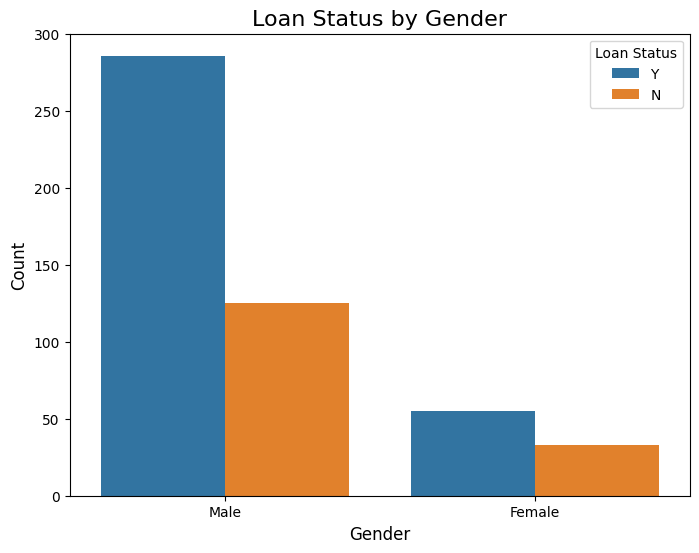

In [42]:
%pip install matplotlib
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Gender', hue='Status')

plt.title('Loan Status by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Status', loc='upper right')

plt.show()

<Axes: xlabel='Credit_History', ylabel='count'>

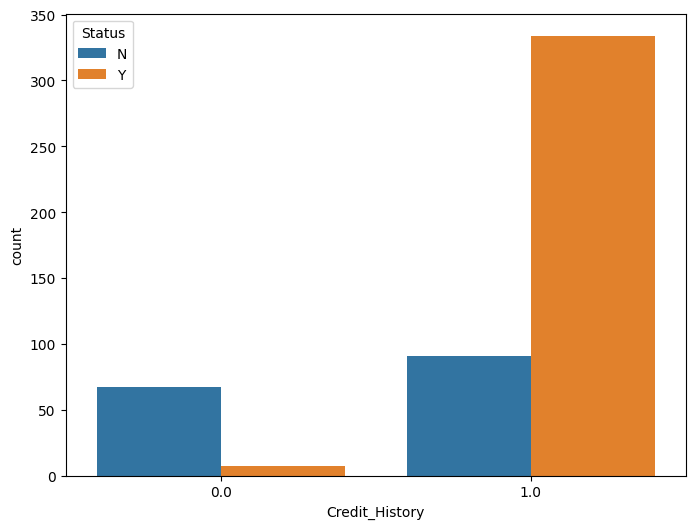

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Credit_History', hue='Status')

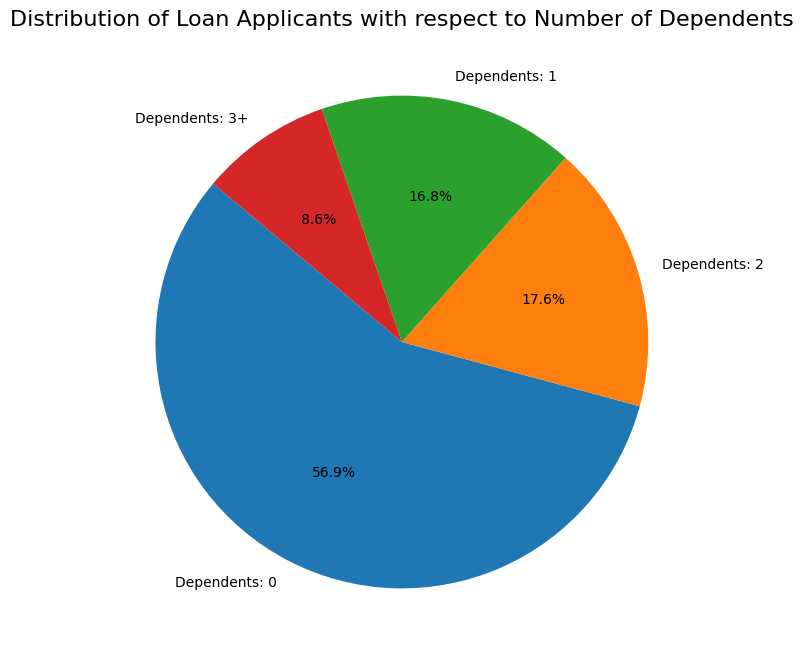

In [44]:
plt.figure(figsize=(8, 8))
Dependents_n = df['Dependents'].value_counts()
custom_labels =[ f"Dependents: {label}" for label in Dependents_n.index]
plt.pie(Dependents_n, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Applicants with respect to Number of Dependents', fontsize=16)
plt.show()

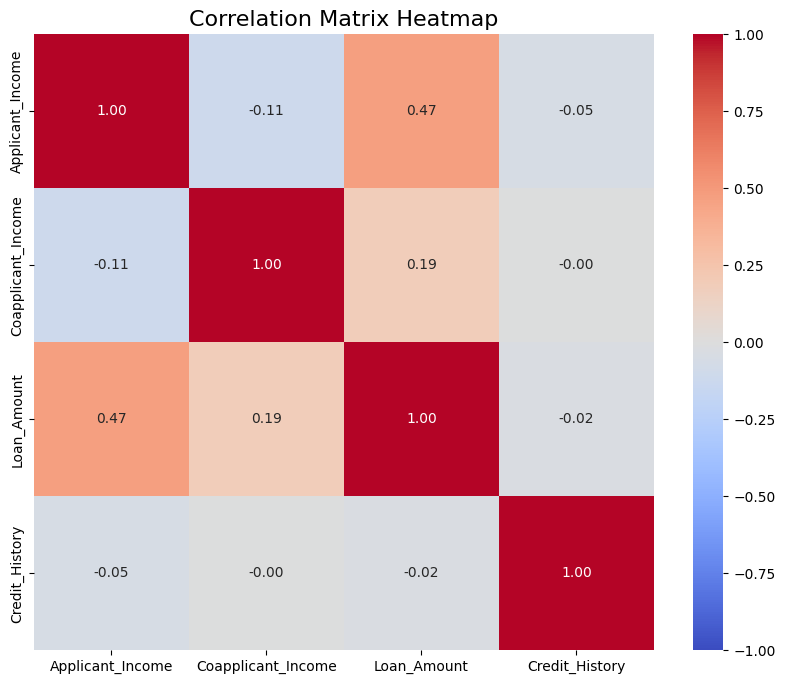

In [45]:
continuous_vars = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Credit_History']

corr_matrix = df[continuous_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.show()